In [4]:
import pandas as pd
df=pd.read_csv("processed.cleveland.data",names=["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","num"])

In [5]:
df.head(n=10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [6]:
df['ca'] = pd.to_numeric(df['ca'],errors='coerce')
df['thal'] = pd.to_numeric(df['thal'],errors='coerce')
df['ca'] = pd.to_numeric(df['num'],errors='coerce')

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        2
num         0
dtype: int64

In [8]:
mean_value=df['thal'].mean()
df.fillna(value=mean_value,inplace=True)
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

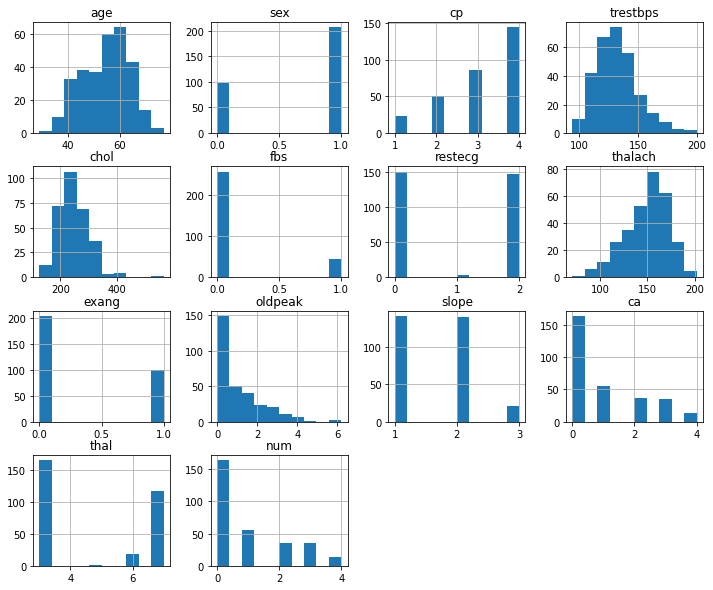

In [9]:
import matplotlib.pyplot as plt
df.hist(figsize=(12,10))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


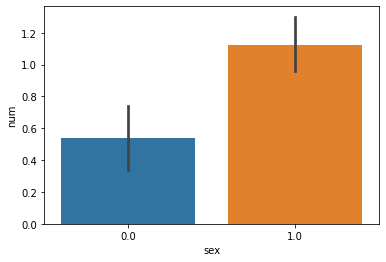

In [11]:
import seaborn as sns
x_val=df['sex']
y_val=df['num']
sns.barplot(x_val,y_val)
plt.show()

In [12]:
x,y=df.loc[:,:'thal'],df['num']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [16]:
knn_prediction = knn.predict(x_test)

In [18]:
from sklearn.metrics import accuracy_score
knn_accuracy_model = accuracy_score(y_test,knn_prediction)

In [19]:
knn_accuracy_model*100

48.35164835164835

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model = DecisionTreeClassifier()
#We gonna train x_train to predict on x_test
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [22]:
prediction = model.predict(x_test)

In [23]:
accuracy_model = accuracy_score(y_test,prediction)


In [25]:
accuracy_model

1.0

In [26]:
from sklearn.linear_model import LinearRegression

In [28]:
model1 = LinearRegression()
#We gonna train x_train to predict on x_test
model1.fit(x_train,y_train)

LinearRegression()

In [32]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,58.0,1.0,4.0,100.0,234.0,0.0,0.0,156.0,0.0,0.1,1.0,2,7.0
183,59.0,1.0,1.0,178.0,270.0,0.0,2.0,145.0,0.0,4.2,3.0,0,7.0
229,66.0,1.0,4.0,112.0,212.0,0.0,2.0,132.0,1.0,0.1,1.0,2,3.0
126,56.0,0.0,4.0,200.0,288.0,1.0,2.0,133.0,1.0,4.0,3.0,3,7.0
184,60.0,0.0,4.0,158.0,305.0,0.0,2.0,161.0,0.0,0.0,1.0,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,46.0,1.0,3.0,150.0,231.0,0.0,0.0,147.0,0.0,3.6,2.0,1,3.0
21,58.0,0.0,1.0,150.0,283.0,1.0,2.0,162.0,0.0,1.0,1.0,0,3.0
210,37.0,0.0,3.0,120.0,215.0,0.0,0.0,170.0,0.0,0.0,1.0,0,3.0
78,48.0,1.0,2.0,130.0,245.0,0.0,2.0,180.0,0.0,0.2,2.0,0,3.0


In [33]:
y_test

246    2
183    0
229    2
126    3
184    1
      ..
69     1
21     0
210    0
78     0
174    4
Name: num, Length: 91, dtype: int64

In [34]:
prediction1 = model1.predict(x_test)

In [35]:
prediction1

array([ 2.00000000e+00,  6.96790532e-15,  2.00000000e+00,  3.00000000e+00,
        1.00000000e+00,  2.00000000e+00,  9.54115672e-15, -1.12149818e-14,
        2.04822296e-14,  1.00000000e+00, -6.92241332e-15,  2.00000000e+00,
        3.00000000e+00,  1.60454139e-15, -1.04986784e-14, -1.11010388e-14,
        3.00000000e+00,  2.28893002e-16,  4.00000000e+00, -7.50197685e-15,
        6.83197868e-16, -1.01603624e-14, -6.51220096e-15,  2.00000000e+00,
       -8.61974880e-15,  1.19284191e-14,  4.00000000e+00,  2.27644188e-15,
        3.00000000e+00,  3.00000000e+00,  4.00000000e+00,  2.00000000e+00,
       -3.76451500e-16,  1.00000000e+00,  2.00000000e+00,  3.00000000e+00,
        1.07701015e-15,  1.00000000e+00, -6.67393045e-15,  4.00000000e+00,
       -8.46712813e-15,  9.66407279e-15, -3.39635865e-15,  1.00000000e+00,
        6.51977130e-15, -2.22457733e-14,  1.00000000e+00,  1.00000000e+00,
        9.56470788e-16,  2.00000000e+00, -4.01880255e-15,  9.98268764e-15,
        2.99568377e-15,  